# Titanic Notebook - IA Neurals!

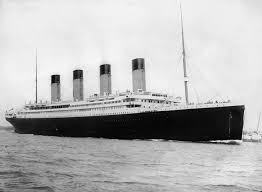

#### Created by: Lucas Moutinho! [Siga meu Github!](https://github.com/lucasmoutinho)

Aula focada em exploração, visualização e pré-processamento de dados utilizando do [dataset de desafio temático do Titanic para iniciantes na plataforma Kaggle](https://www.kaggle.com/c/titanic/data)



## Explorando o dataset e os dados

#### Importando bibliotecas padrão

In [1]:
# Importando bibliotecas padrão

import numpy as np # Valores numéricos
import matplotlib.pyplot as plt # Visualização
import pandas as pd # Dataframes


# Coisas pra visualização ficar bunitinha (não precisa esquentar com isso)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import seaborn
seaborn.set() 

#### Criando dataframes a partir da leitura dos datasets

In [10]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("train.csv")
df = pd.concat([df_train, df_test], axis = 0, ignore_index=True)

#### Analisando características gerais do dataset

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   int64  
 1   Survived     1782 non-null   int64  
 2   Pclass       1782 non-null   int64  
 3   Name         1782 non-null   object 
 4   Sex          1782 non-null   object 
 5   Age          1428 non-null   float64
 6   SibSp        1782 non-null   int64  
 7   Parch        1782 non-null   int64  
 8   Ticket       1782 non-null   object 
 9   Fare         1782 non-null   float64
 10  Cabin        408 non-null    object 
 11  Embarked     1778 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 167.2+ KB


In [13]:
pd.isnull(dataset).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Explorando os dados

In [23]:
survivor_count = df.groupby('Survived').count()['PassengerId']
survivor_count

Survived
0    1098
1     684
Name: PassengerId, dtype: int64

In [48]:
sex_count = df.groupby('Sex').count()['PassengerId']
sex_count

Sex
female     628
male      1154
Name: PassengerId, dtype: int64

In [54]:
sex_count = df.groupby('Pclass').count()['PassengerId']
sex_count

Pclass
1    432
2    368
3    982
Name: PassengerId, dtype: int64

In [52]:
survivor_sex_count = df.groupby(['Survived', 'Sex']).count()['PassengerId']
survivor_sex_count

Survived  Sex   
0         female    162
          male      936
1         female    466
          male      218
Name: PassengerId, dtype: int64

In [53]:
survivor_class_count = df.groupby(['Survived', 'Pclass']).count()['PassengerId']
survivor_class_count

Survived  Pclass
0         1         160
          2         194
          3         744
1         1         272
          2         174
          3         238
Name: PassengerId, dtype: int64

In [25]:
survivor_age = df.groupby('Survived').mean()['Age']
survivor_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [45]:
df['Age'].isna().sum()

354

In [29]:
sex_age = df.groupby(['Survived', 'Sex']).mean()['Age']
sex_age

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [38]:
female_died_age_mean = sex_age.iloc[0]
male_died_age_mean = sex_age.iloc[1]
female_survived_age_mean = sex_age.iloc[2]
male_survived_age_mean = sex_age.iloc[3]
female_died_age_mean, male_died_age_mean

(25.046875, 31.618055555555557)

In [39]:
embarked_count = df.groupby('Embarked').count()['PassengerId']
embarked_count

Embarked
C     336
Q     154
S    1288
Name: PassengerId, dtype: int64

In [40]:
df['Embarked'].isna().sum()

4

In [42]:
cabin_count = df.groupby('Cabin').count()['PassengerId'].sort_values()
cabin_count

Cabin
A10            2
D30            2
D28            2
D21            2
D19            2
              ..
C22 C26        6
F2             6
C23 C25 C27    8
G6             8
B96 B98        8
Name: PassengerId, Length: 147, dtype: int64

In [43]:
df['Cabin'].isna().sum()

1374

#### Visualizando os dados

In [56]:
survived_class = df[df['Survived']==1]
survived_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1766,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
1770,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
1771,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
1778,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [72]:
survived_class = df[df['Survived']==1]['Pclass'].value_counts()
survived_class

1    272
3    238
2    174
Name: Pclass, dtype: int64

In [66]:
dead_class = df[df['Survived']==0]['Pclass'].value_counts()
dead_class

3    744
2    194
1    160
Name: Pclass, dtype: int64

In [64]:
df_class = pd.DataFrame([survived_class,dead_class])
df_class

,1,2,3
Pclass,272,174,238
Pclass,160,194,744


In [65]:
# Visuzlization Code by RochelleSilve: https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners

# Visualizando em tabela

df_class.index = ['Survived','Died']
df_class

,1,2,3
Survived,272,174,238
Died,160,194,744


In [67]:
# Visualizando em porcentagens

#-------------------Survived/Died by Class -------------------------------------
Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


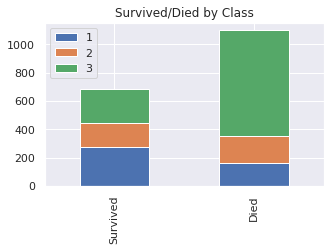

In [71]:
# Visualizando em gráficos

df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

#### Visualizando outros dados

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


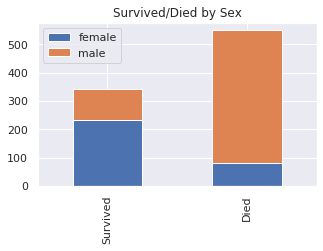

In [73]:
#-------------------Survived/Died by SEX------------------------------------
   
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


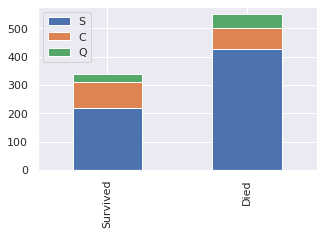

In [74]:
#-------------------- Survived/Died by Embarked ----------------------------

survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

from IPython.display import display
display(df_embark)

#### Preparando os dados